# Noise

In [56]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process.kernels import ExpSineSquared, RBF

from darts import TimeSeries
from darts.models import GaussianProcessFilter
from darts.utils import timeseries_generation as tg

In [57]:
import pandas as pd

df = pd.read_csv("Magnetism.csv")
# df

In [58]:
df_filtered = df[df['CCR_ID'] == './CCR-05/2014/20140320.txt']
df_filtered
df = df_filtered

In [59]:
df = df.drop(['CCR_ID'], axis=1)
# df
# df.to_csv('CCR_edited.csv')

In [5]:
import pandas as pd
import numpy as np

def add_noise_to_time_series(time_series, noise_level):
    noise = np.random.normal(scale=noise_level, size=time_series.shape)
    noisy_time_series = time_series + noise
    return noisy_time_series

noise_level = 4  # Adjust the noise level according to your needs

# Convert DataFrame to NumPy array
temp = df
temp = temp.drop('Timestamp', axis=1)
temp = temp.drop('Elapsed time (minutes)', axis=1)
time_series = temp.values

# time_series = df.values
# print(time_series)

noisy_time_series = add_noise_to_time_series(time_series, noise_level)

# Convert the noisy_time_series values to strings
noisy_time_series = np.array(noisy_time_series, dtype=str)

# Concatenate the noisy_time_series with the original DataFrame
# noisy_df = pd.DataFrame(noisy_time_series, columns=temp.columns)

noisy_df = pd.DataFrame(noisy_time_series, columns=temp.columns[0:])
noisy_df['Timestamp'] = df['Timestamp']
noisy_df['Elapsed time (minutes)'] = df['Elapsed time (minutes)']

print(noisy_df)

              Setpoint (K)        Sensor A (K)        Sensor B (K)  \
0        5.832349009161689    280.919348830411   277.9405595204582   
1       1.6741574125565981   281.1982971138209  278.14481383088054   
2      -2.6602941841742176  278.42367803150023  285.68976196566814   
3      -3.4463676243290595  285.75073264095187   288.5136453687086   
4      -7.3149154305511495     283.18258948126  281.95984460576955   
...                    ...                 ...                 ...   
14467   -4.241871697136784   276.8229257389087  272.99088957475664   
14468  -0.8954581502257407   282.7783032038455   275.4980463424706   
14469    2.437815611508603  271.73746173872473    278.495965709451   
14470   2.0936949819279835  280.41439125726674   272.2123957826111   
14471  -2.9715994885553147  275.12897141584904   275.9101016007668   

      Heater Output % (0-100) Heater Range (integer 0-5)  \
0          1.1170671217588173          4.800817012823237   
1          0.7293059800290757          

In [122]:
noisy_df = noisy_df.drop(['Timestamp'], axis=1)
time_series = TimeSeries.from_dataframe(noisy_df,)

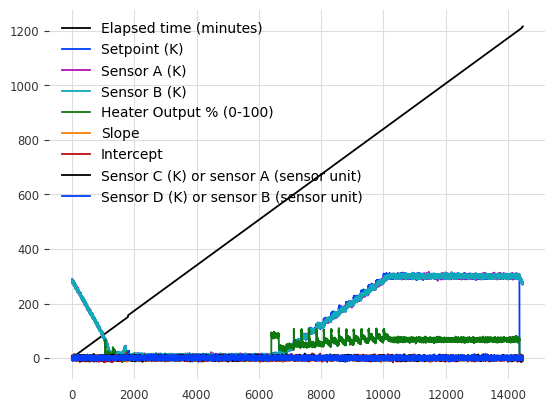

In [123]:
plt.plot(time_series['Elapsed time (minutes)'].pd_series(), label="Elapsed time (minutes)")
plt.plot(time_series['Setpoint (K)'].pd_series(), label="Setpoint (K)")
plt.plot(time_series['Sensor A (K)'].pd_series(), label="Sensor A (K)")
plt.plot(time_series['Sensor B (K)'].pd_series(), label="Sensor B (K)")
plt.plot(time_series['Heater Output % (0-100)'].pd_series(), label="Heater Output % (0-100)")
plt.plot(time_series['Slope'].pd_series(), label="Slope")
plt.plot(time_series['Intercept'].pd_series(), label="Intercept")
plt.plot(time_series['Sensor C (K) or sensor A (sensor unit)'].pd_series(), label="Sensor C (K) or sensor A (sensor unit)")
plt.plot(time_series['Sensor D (K) or sensor B (sensor unit)'].pd_series(), label="Sensor D (K) or sensor B (sensor unit)")

# plt.plot(pred.pd_series(), label= "forecast")
plt.legend()
plt.show()

# Dynamic Time Warping

# Feature Filtering 

In [ ]:
import pandas as pd
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute

# Load your multivariate time series dataset into a pandas DataFrame
# Assuming your dataset is in a file called "magnetism.csv"
dataset = pd.read_csv('magnetism.csv')

# Preprocess your data if needed (e.g., handle missing values, resampling, etc.)

# Rename the columns if needed to match the expected format by tsfresh
# Assuming "Magnetism_ID" represents the time series and "Timestamp" represents the time of that data reading
preprocessed_data = dataset.rename(columns={'Magnetism_ID': 'id', 'Timestamp': 'time', 'Elapsed time (minutes)': 'value_2', 'Set B field (T)': 'value_3',
                                            'B field (T)': 'value_4', 'Ramp speed (T/min)': 'value_5', 'Voltage (V)': 'value_6',
                                            'Inner Lower Temperature': 'value_7', 'Outer Lower Temperature': 'value_8',
                                            'Inner Upper Temperature': 'value_9', 'Outer Upper Temperature': 'value_10',
                                            '1st Stage Temperature': 'value_11', 'Shield Temperature': 'value_12',
                                            '2nd Stage Temperature': 'value_13'})

# Concatenate "id" and "time" columns into a single identifier column
preprocessed_data['identifier'] = preprocessed_data['id'] + '_' + preprocessed_data['time'].astype(str)

# Reshape the data to long format for tsfresh
preprocessed_data_long = preprocessed_data.melt(id_vars='identifier', var_name='variable', value_name='value')

# Extract features using tsfresh
extracted_features = extract_features(preprocessed_data_long, column_id='identifier', column_value='value', column_kind='variable')

# Impute missing values in the extracted features (if any)
extracted_features = impute(extracted_features)

# Perform feature selection using tsfresh
# Assuming you want to select the top k features based on the p-value
selected_features = select_features(extracted_features, dataset['target'], fdr_level=0.05, ml_task='classification')


In [3]:
import pandas as pd
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute

# Load your multivariate time series dataset into a pandas DataFrame
# Assuming your dataset is in a file called "magnetism.csv"
dataset = pd.read_csv('Data/CCR.csv')

# Preprocess your data if needed (e.g., handle missing values, resampling, etc.)

# Rename the columns if needed to match the expected format by tsfresh
# Assuming "Magnetism_ID" represents the time series and "Timestamp" represents the time of that data reading
preprocessed_data = dataset.rename(columns={'CCR_ID': 'id', 'Timestamp': 'time', 'Elapsed time (minutes)': 'value_2', 'Setpoint (K)': 'value_3',
                                            'Sensor A (K)': 'value_4', 'Sensor B (K)': 'value_5', 'Heater Output % (0-100)': 'value_6',
                                            'Heater Range (integer 0-5)': 'value_7', 'Slope': 'value_8',
                                            'Intercept': 'value_9', 'Sensor C (K) or Sensor A (sensor unit)': 'value_10',
                                            'Sensor D (K) or Sensor B (sensor unit)': 'value_11',})

# Concatenate "id" and "time" columns into a single identifier column
preprocessed_data['identifier'] = preprocessed_data['id'] + '_' + preprocessed_data['time'].astype(str)

# Reshape the data to long format for tsfresh
preprocessed_data_long = preprocessed_data.melt(id_vars='identifier', var_name='variable', value_name='value')

# Extract features using tsfresh
print("here")
extracted_features = extract_features(preprocessed_data_long, column_id='identifier', column_value='value', column_kind='variable')
print('here')
# Impute missing values in the extracted features (if any)
extracted_features = impute(extracted_features)

# Perform feature selection using tsfresh
# Assuming you want to select the top k features based on the p-value
selected_features = select_features(extracted_features, dataset['target'], fdr_level=0.05, ml_task='classification')


here


Feature Extraction:   0%|          | 0/30 [00:55<?, ?it/s]


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Rearrange Column Order

# Savitsky-Golay Filter

In [22]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt 

In [54]:
df = temp

In [60]:
temp = df
df = df[1200:1800]
df

,Timestamp,Elapsed time (minutes),Setpoint (K),Sensor A (K),Sensor B (K),Heater Output % (0-100),Heater Range (integer 0-5),Slope,Intercept,Sensor C (K) or sensor A (sensor unit),Sensor D (K) or sensor B (sensor unit)
1200,03/20/2014 04:42:25 PM,100.986348,10.0,24.2090,24.2120,14.7,5,-0.252360,-2.474394,1.12409,1.12406
1201,03/20/2014 04:42:30 PM,101.069256,10.0,23.8140,23.8260,15.2,5,-0.228160,-2.633240,1.12773,1.12762
1202,03/20/2014 04:42:35 PM,101.153015,10.0,23.3940,23.4160,15.6,5,-0.204345,-2.788280,1.13337,1.13306
1203,03/20/2014 04:42:40 PM,101.236773,10.0,23.0070,23.0300,15.9,5,-0.182477,-2.930091,1.14068,1.14014
1204,03/20/2014 04:42:45 PM,101.319681,10.0,22.6230,22.6500,16.2,5,-0.164278,-3.048324,1.14875,1.14812
...,...,...,...,...,...,...,...,...,...,...,...
1795,03/20/2014 05:32:00 PM,150.570723,20.0,7.2467,6.9718,0.0,1,-1.108063,3.644088,1.46878,1.47804
1796,03/20/2014 05:32:05 PM,150.654481,20.0,7.1974,6.9258,0.0,1,-1.062897,3.370820,1.47016,1.47955
1797,03/20/2014 05:32:10 PM,150.737406,20.0,7.1801,6.9064,0.0,1,-1.017715,3.098672,1.47125,1.48037
1798,03/20/2014 05:32:15 PM,150.821164,20.0,7.1554,6.8861,0.0,1,-0.972668,2.828242,1.47174,1.48108


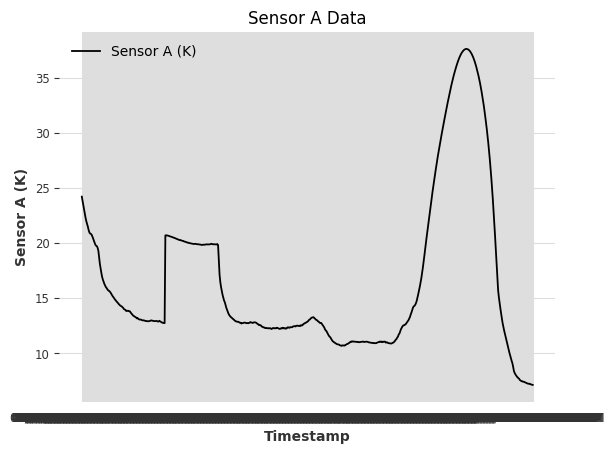

In [61]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

timestamps = df['Timestamp']
sensor_a = df['Sensor A (K)']

fig, ax = plt.subplots()
ax.plot(timestamps, sensor_a, label='Sensor A (K)')

# Format x-axis labels as time
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %I:%M:%S %p'))

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Add labels, legend, and title if needed
plt.xlabel('Timestamp')
plt.ylabel('Sensor A (K)')
plt.legend()
plt.title('Sensor A Data')

# Display the graph
plt.show()


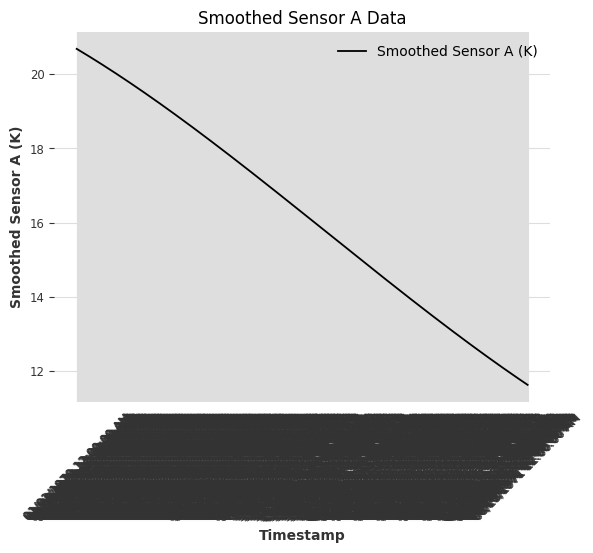

In [62]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

timestamps = df['Timestamp']
sensor_a = df['Sensor A (K)']

# Apply Savitzky-Golay filter
y_smooth = savgol_filter(sensor_a, window_length=1900, polyorder=2, mode="nearest")

fig, ax = plt.subplots()
ax.plot(timestamps, y_smooth, label='Smoothed Sensor A (K)')

# Format x-axis labels as time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %I:%M:%S %p'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels, legend, and title if needed
plt.xlabel('Timestamp')
plt.ylabel('Smoothed Sensor A (K)')
plt.legend()
plt.title('Smoothed Sensor A Data')

# Display the graph
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

fig, ax = plt.subplots(4, figsize=(8, 14))
window_sizes = [100, 200, 300]
i = 0

window_length = 5
polyorder = 2

# Apply the Savitzky-Golay filter to the selected column
filtered_data = savgol_filter(df[data_column], window_length, polyorder)

for w_size in window_sizes:
    y_fit = savgol_filter(sensor_a, w_size, 3)
    ax[i].plot(timestamps, sensor_a, label="Sensor A (K)", color="green")
    ax[i].plot(timestamps, y_fit, label="Smoothed Sensor A (K)", color="red")
    ax[i].set_title("Window size: " + str(w_size))
    ax[i].legend()
    ax[i].grid(True)
    i += 1

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.signal import savgol_filter

# Read the CSV data into a pandas DataFrame
input_csv_file = 'input_data.csv'
output_csv_file = 'output_data.csv'
df = pd.read_csv(input_csv_file)

# Set the column containing the data you want to filter
data_column = 'Value'  # Replace 'Value' with the actual column name

# Set the parameters for the Savitzky-Golay filter
window_length = 5
polyorder = 2

# Apply the Savitzky-Golay filter to the selected column
filtered_data = savgol_filter(df[data_column], window_length, polyorder)

# Add the filtered data back to the DataFrame
df['Filtered_' + data_column] = filtered_data

# Save the DataFrame with the filtered data to a new CSV file
df.to_csv(output_csv_file, index=False)

print("Savitzky-Golay filter applied and saved to", output_csv_file)


# Feature Engineering

In [24]:
import pandas as pd

In [63]:
import pandas as pd

def split_data_by_id(df, id_column, chunk_size):
    grouped_data = df.groupby(id_column)
    chunks = []

    for _, group in grouped_data:
        num_chunks = len(group) // chunk_size
        if num_chunks == 0:
            chunks.append(group)
        else:
            for i in range(num_chunks):
                chunks.append(group.iloc[i*chunk_size:(i+1)*chunk_size])

            remainder = len(group) % chunk_size
            if remainder > 0:
                chunks.append(group.iloc[-remainder:])

    return chunks

# Replace 'your_file.csv' with the path to your CSV file
csv_file = 'magnetism.csv'
# Replace 'id_column_name' with the column name that denotes the ID in the CSV file
id_column_name = 'Magnetism_ID'
chunk_size = 600

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Split the data into chunks based on the specified ID column and chunk size
data_chunks = split_data_by_id(df, id_column_name, chunk_size)

# Now data_chunks is a list of DataFrames, each containing up to 600 records for the corresponding ID.
# You can access each chunk of data using standard list indexing.
# For example, to access the first chunk:
first_chunk = data_chunks[0]


FileNotFoundError: [Errno 2] No such file or directory: 'magnetism.csv'